# covid-19 캐글 과제 

캐글 주소 : https://www.kaggle.com/gatunnopvp/coronavirus-covid-19-growth-updated-05-15-20/data?select=COVID19_line_list_data.csv

In [3]:
#pandas , numpy , seeborn , matplotlib.pyplot 설정 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# github 주소로 csv 파일 정보 불러오기 

conf = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
rec = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dea = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [5]:
# csv 파일 정보 csv 파일로 저장 
confirmed = pd.read_csv(conf)
recovered = pd.read_csv(rec)
deaths = pd.read_csv(dea)

In [4]:
# numpy 설정
confirmed = np.sum(confirmed.iloc[:,4:confirmed.shape[1]])
recovered = np.sum(recovered.iloc[:,4:recovered.shape[1]])
deaths = np.sum(deaths.iloc[:,4:deaths.shape[1]])

In [5]:
#전세계 사망률 (확진자 / 사망자 *100 )
global_mortality = (deaths/confirmed)*100

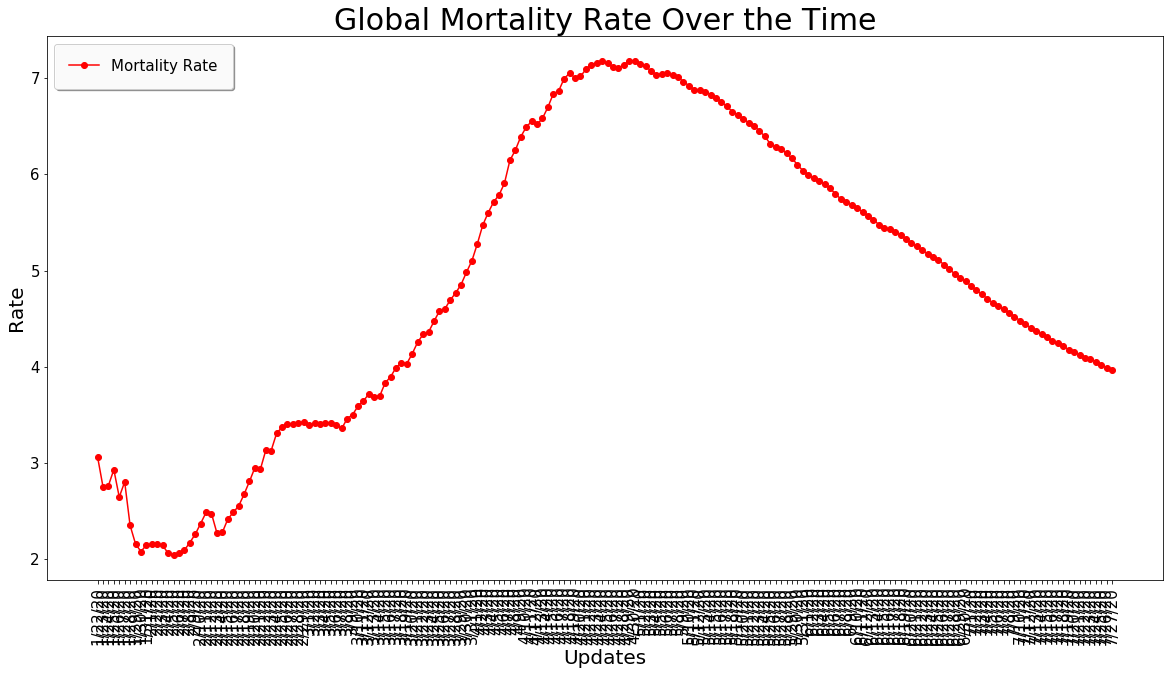

In [6]:
#그래프 날짜는 (1/22~ 7/27일까지)

#그래프 크기 설정
plt.figure(figsize=(20,10))

#그래프 표시 설정 
plt.plot(global_mortality
        , color = 'red'
        , label = 'Mortality Rate'
        , marker = 'o')

#그래프 내용 설정
plt.title('Global Mortality Rate Over the Time',size=30)
plt.ylabel('Rate',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [75]:
#새로운 설정 만들기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [50]:
confirmed = pd.read_csv(conf)
recovered = pd.read_csv(rec)
deaths = pd.read_csv(dea)

In [52]:
# 결측값에 'unknow'라고 표시 
confirmed = confirmed.fillna('unknow')
recovered = recovered.fillna('unknow')
deaths = deaths.fillna('unknow')

In [53]:
#마지막 업데이트 날짜 
last_update = '7/27/20'

In [54]:
#마지막 날짜 기준으로 "중국" 데이터만 설정 
confir = confirmed[['Province/State',last_update]][confirmed['Country/Region']=='China'][last_update]
recover = recovered[last_update][recovered['Country/Region']=='China']
deat = deaths[last_update][deaths['Country/Region']=='China']

china_cases = confirmed[['Province/State',last_update]][confirmed['Country/Region']=='China']
china_cases['recovered'] = recover
china_cases['non_recovered'] = confir
china_cases['deaths'] = deat

In [55]:
#Province/State 인덱스 설정 
china_cases = china_cases.set_index('Province/State')

In [57]:
#china_cases 컬럼 이름 바꾸기 
china_cases = china_cases.rename(columns = {last_update:'confirmed',
                                           'recoverd':'recoverd',
                                           'non_recoverd' : 'non_recoverd',
                                           'deaths' : 'deaths'})
china_cases.iloc[13,1] = 83959
china_cases.iloc[13,2] = 18

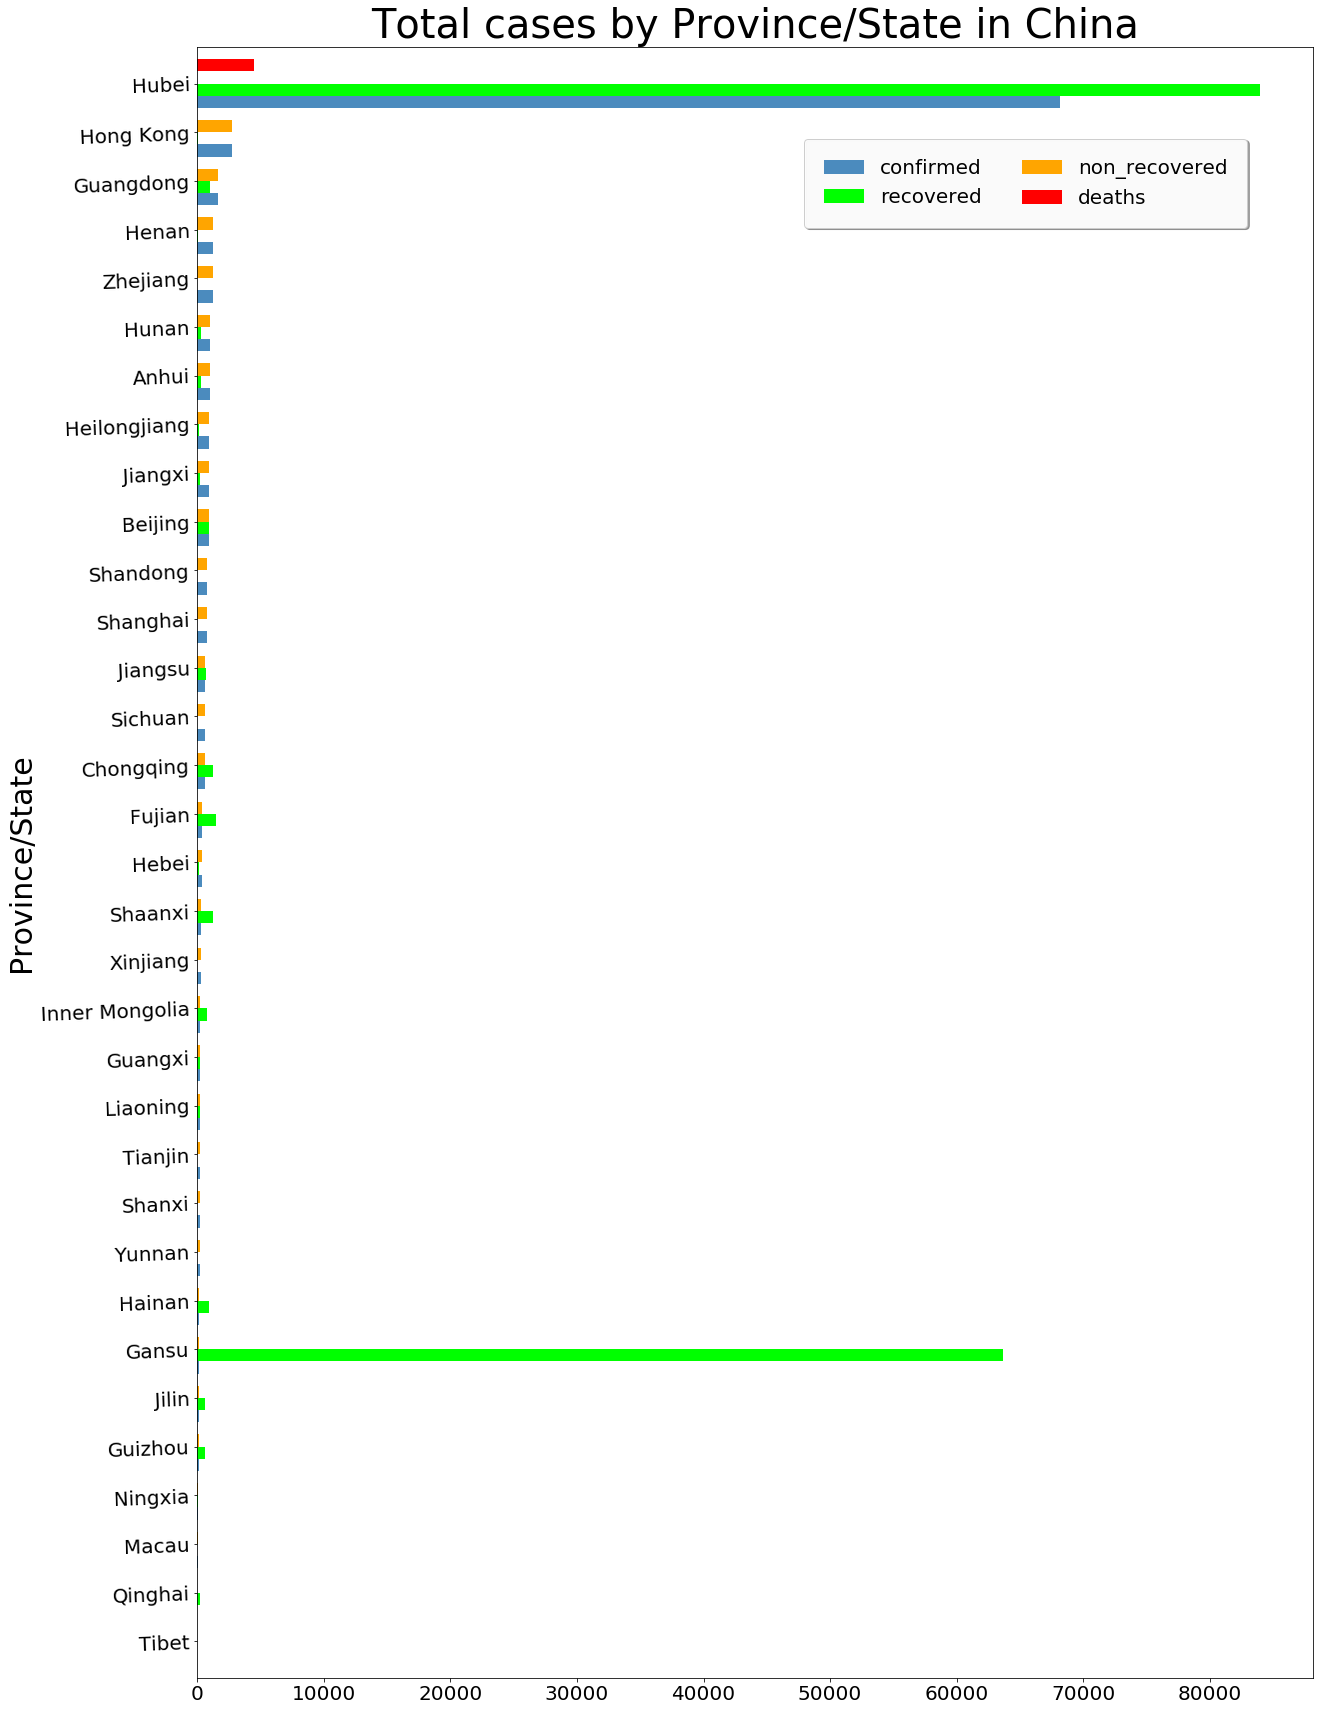

In [59]:
# 중국 지역별 (확진자 , 회복, 사망자, 치료받는 사람) 그래프 
china_cases.sort_values(by='confirmed',ascending=True).plot(kind='barh',
                                                           figsize=(20,30),
                                                           color =['#4b8bbe','lime','orange','red'],
                                                           width =1 , rot=2)

plt.title('Total cases by Province/State in China', size=40)
plt.ylabel('Province/State',size=30)
plt.yticks(size=20)
plt.xticks(size=20)

#그래프 색깔 설명 박스 위치 조정 
plt.legend(bbox_to_anchor=(0.95,0.95) 
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);
                                                            

In [60]:
# 중국 내 감염자가 제일 많은 곳은 후베이성 
# 후베이성만 설정 
Hubei = china_cases[china_cases.index=="Hubei"]
Hubei = Hubei.iloc[0]
Hubei = Hubei.iloc[1:4]

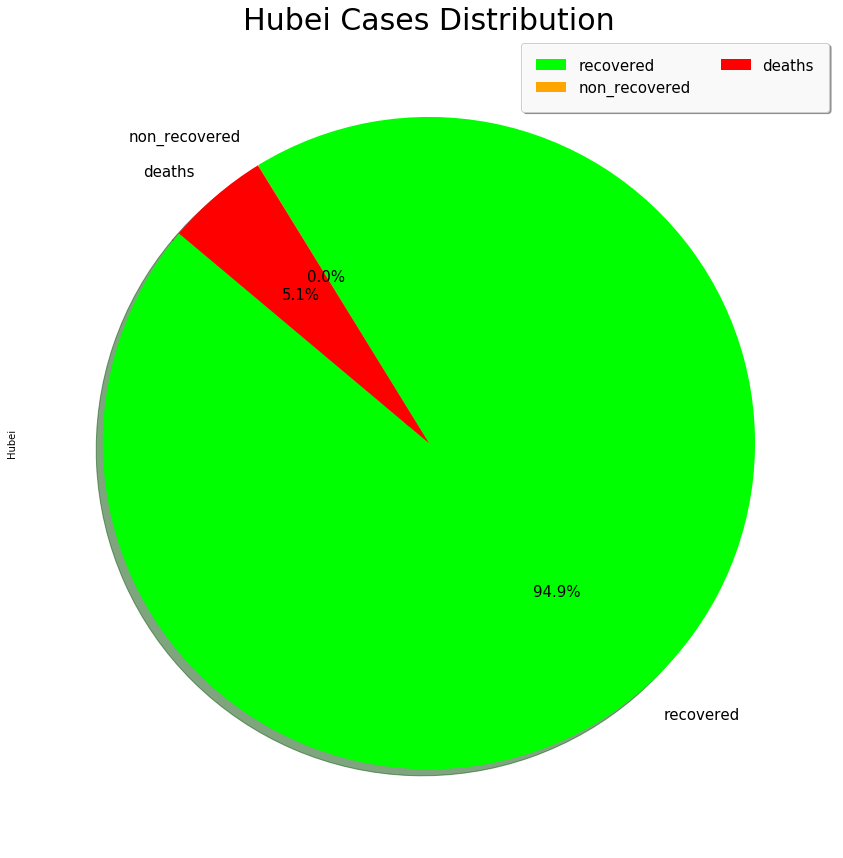

In [61]:
#그래프 사이즈 설정 
plt.figure(figsize=(15,15))

# 그래프 그리기 
Hubei.plot(kind='pie'
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # 퍼센트 추가 
           , shadow=True
           , startangle=140
           , fontsize = 15)

#그래프 제목 
plt.title('Hubei Cases Distribution',size=30)

#색깔별 그래프 박스 설정 
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [62]:
#중국 이외의 나라들만 설정하기  

confir = confirmed[['Country/Region','Province/State',last_update]][confirmed['Country/Region']!='China'][last_update]
recover = recovered[last_update][recovered['Country/Region']!='China']
deat = deaths[last_update][deaths['Country/Region']!='China']

In [68]:
# 상황에 맞는 이름 변경 
other_countries = confirmed[['Country/Region','Province/State',last_update]][confirmed['Country/Region']!='China']
other_countries['recovered'] = recover
other_countries['non_recovered'] = confir-recover-deat
other_countries['deaths'] = deat

In [69]:
other_countries = other_countries.groupby(other_countries['Country/Region']).sum()

In [70]:

other_countries = other_countries.rename(columns = {last_update:'confirmed'
                                                    ,'recovered':'recovered'
                                                    ,'non_recovered':'non_recovered'
                                                    ,'deaths':'deaths'})

In [76]:
other_countries['non_recovered'][other_countries['non_recovered']<0] = 0

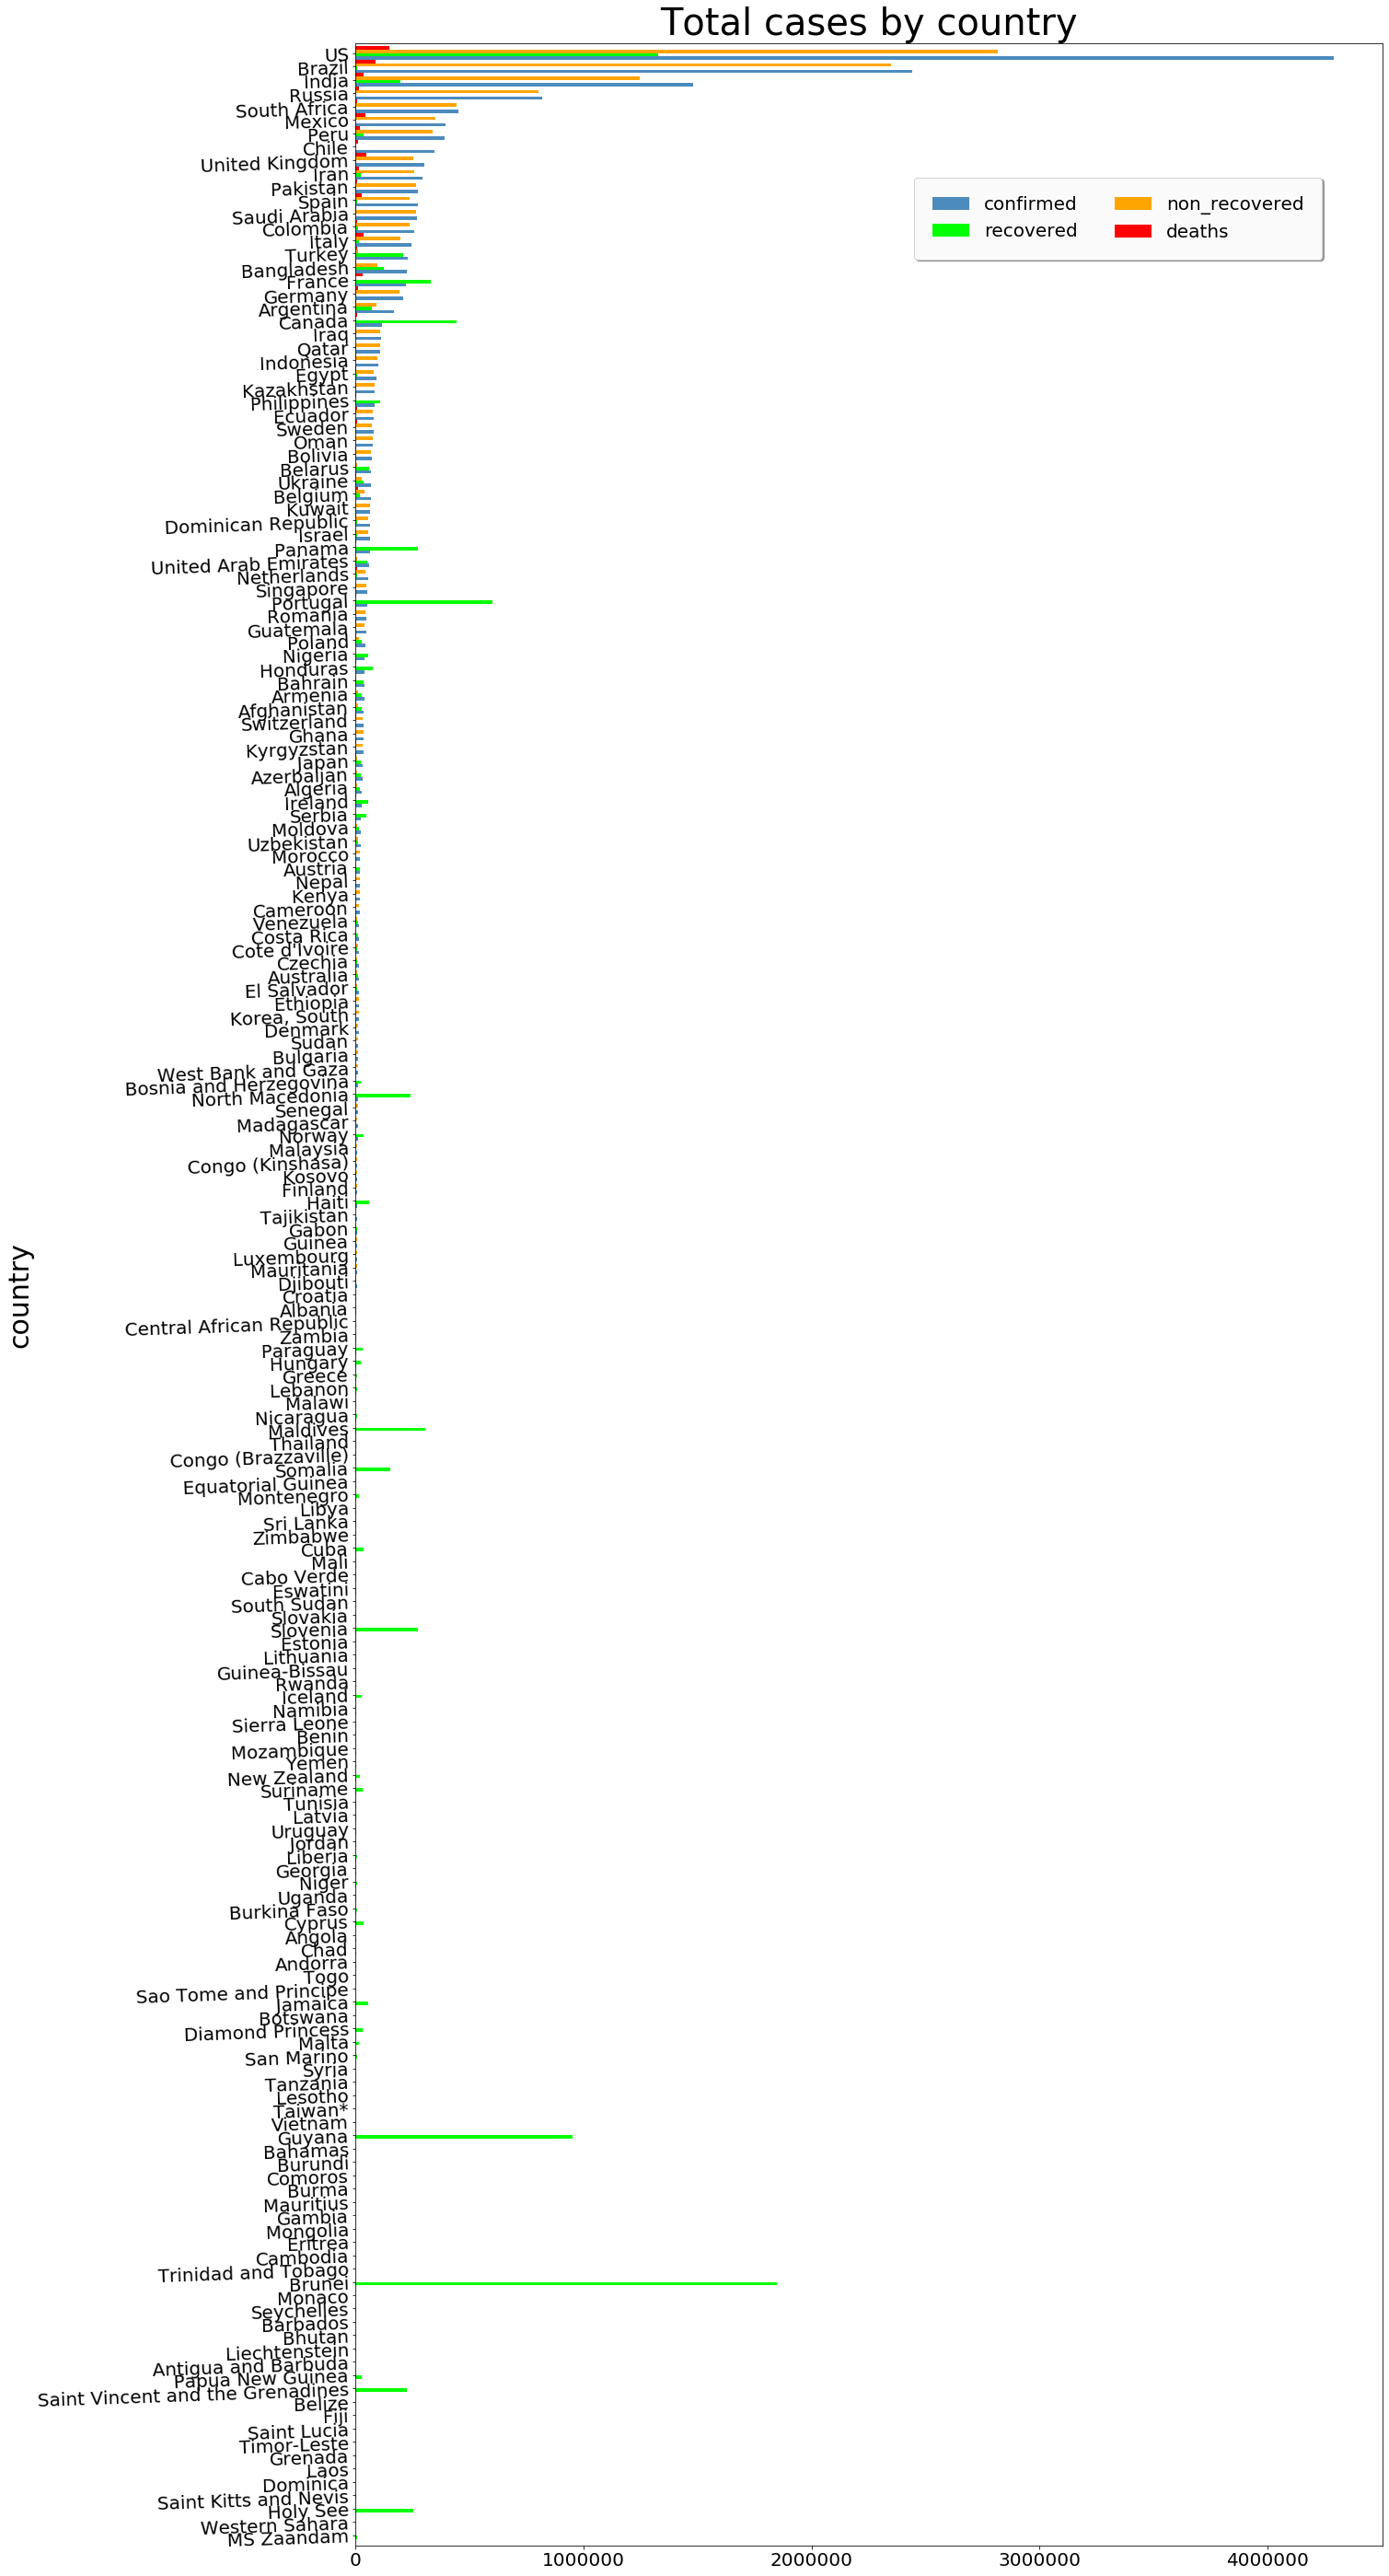

In [101]:
# 그래프 그리기
other_countries.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                                , figsize=(20,50)
                                                                , color = ['#4b8bbe','lime','orange','red']
                                                                , width=1
                                                                , rot=2
                                                                , fontsize = 17)

# 그래프 제목 및 라벨 설정 
plt.title('Total cases by country', size=40)
plt.ylabel('country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)


#그래프 색깔 설명 박스 위치 조정 
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [100]:
# 업데이트 날짜 시점 확진자 top 10 국가
other_countries.sort_values(by='confirmed',ascending=False).head(10)

,confirmed,recovered,non_recovered,deaths
Country/Region,,,,
US,4290259,1325804.0,2816444.0,148011
Brazil,2442375,4930.0,2349827.0,87618
India,1480073,198593.0,1248072.0,33408
Russia,816680,22.0,803324.0,13334
South Africa,452529,2121.0,443341.0,7067
Mexico,395489,809.0,350658.0,44022
Peru,389717,35375.0,335924.0,18418
Chile,347923,0.0,0.0,9187
United Kingdom,301708,3273.0,252578.0,45844


In [12]:
#top10 국가 설정하기 
top_10_confirmed = confirmed[(confirmed['Country/Region']=='US') | 
                             (confirmed['Country/Region']=='Brazil') |
                             (confirmed['Country/Region']=='India') |
                             (confirmed['Country/Region']=='Russia') |
                             (confirmed['Country/Region']=='South Africa') |
                             (confirmed['Country/Region']=='Mexico') |
                             (confirmed['Country/Region']=='Peru') |
                             (confirmed['Country/Region']=='Chile') |
                             (confirmed['Country/Region']=='United Kingdom') |
                             (confirmed['Country/Region']=='Iran')]


#top10 국가 그룹으로 묶기 
top_10_confirmed = top_10_confirmed.groupby(top_10_confirmed['Country/Region']).sum()

top_10_confirmed = top_10_confirmed.drop(['Lat','Long'], axis = 1)
top_10_confirmed = top_10_confirmed.transpose()

top_10_confirmed

Country/Region,Brazil,Chile,India,Iran,Mexico,Peru,Russia,South Africa,US,United Kingdom
1/22/20,0,0,0,0,0,0,0,0,1,0
1/23/20,0,0,0,0,0,0,0,0,1,0
1/24/20,0,0,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,2287475,338759,1288108,284034,370712,371096,793720,408052,4038816,298731
7/24/20,2343366,341304,1337024,286523,378285,375961,799499,421996,4112531,299500
7/25/20,2394513,343592,1385635,288839,385036,375961,805332,434200,4178970,300270
7/26/20,2419091,345790,1435616,291172,390516,375961,811073,445433,4233923,301020


In [10]:
# 그래프 그리기
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

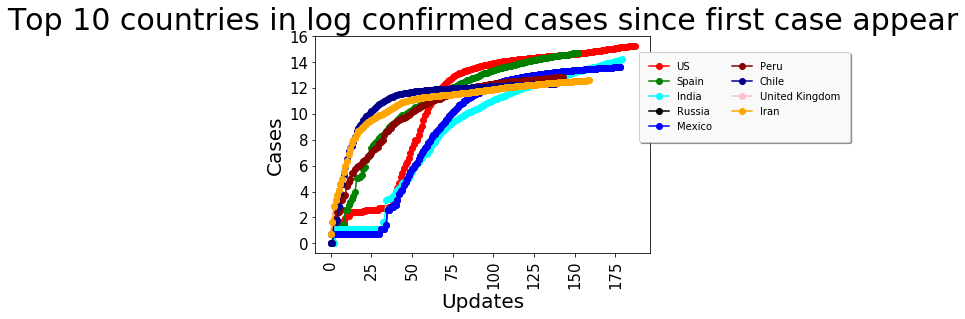

In [24]:
#top10 국가별 로그 데이터로 라인그래프 설정 및 그리기 


US = top_10_confirmed['US'][top_10_confirmed['US']>0].reset_index().drop('index',axis=1)


plt.plot(np.log(US)
        , color = 'red'
        , label = 'US'
        , marker = 'o')

Brazil = top_10_confirmed['Brazil'][top_10_confirmed['Brazil']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Brazil)
        , color = 'green'
        , label = 'Spain'
        , marker = 'o')


India = top_10_confirmed['India'][top_10_confirmed['India']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(India)
        , color = 'cyan'
        , label = 'India'
        , marker = 'o')


Russia = top_10_confirmed['Russia'][top_10_confirmed['Russia']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Russia)
        , color = 'black'
        , label = 'Russia'
        , marker = 'o')

Mexico = top_10_confirmed['Mexico'][top_10_confirmed['Mexico']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Russia)
        , color = 'blue'
        , label = 'Mexico'
        , marker = 'o')

Peru = top_10_confirmed['Peru'][top_10_confirmed['Peru']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Peru)
        , color = 'darkred'
        , label = 'Peru'
        , marker = 'o')


Chile = top_10_confirmed['Chile'][top_10_confirmed['Chile']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Turkey)
        , color = 'darkblue'
        , label = 'Chile'
        , marker = 'o')


UK = top_10_confirmed['United Kingdom'][top_10_confirmed['United Kingdom']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Iran)
        , color = 'pink'
        , label = 'United Kingdom'
        , marker = 'o')


Iran = top_10_confirmed['Iran'][top_10_confirmed['Iran']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Iran)
        , color = 'orange'
        , label = 'Iran'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Top 10 countries in log confirmed cases since first case appear',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

#그래프 색깔 설명 박스 위치 조정 
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 10
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);